In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import DMatrix
from fastai import *
from fastai.tabular import *

In [0]:
rheindata = pd.read_csv("/content/drive/My Drive/fastai/data_rhein_incl_km(1).csv")

In [51]:
rheindata.head

<bound method NDFrame.head of       Unnamed: 0 Kürzel  Status Nr.   Labornummer  ...  month day month.1  day.1
0              0     RE          7.0      16354.0  ...      5  26       5     26
1              1     RE          1.0      16487.0  ...      6   2       6      2
2              2     RE          4.0      16619.0  ...      6   9       6      9
3              3     RE          1.0      16705.0  ...      6  16       6     16
4              4     RE          1.0      16843.0  ...      6  23       6     23
...          ...    ...          ...          ...  ...    ...  ..     ...    ...
3108        3108     SC          NaN       1984.0  ...      6  11       6     11
3109        3109     SC          NaN      39714.0  ...      6  25       6     25
3110        3110     SC          NaN      39746.0  ...      7   9       7      9
3111        3111     SC          NaN      39792.0  ...      7  23       7     23
3112        3112     SC          NaN      39840.0  ...      8   6       8      

In [0]:
rheindata = rheindata[["Kürzel","Date","year","month","day","Temp.(BAFU)","pH(BAFU)","Leitf. 25°C(BAFU)","Sauerstoff","Sauerstoffsätt.%","pH (EAWAG)","Leitf.20°C (EAWAG)","Alkalinität","Calcium","Magnesium","Nitrit","Nitrat","Ammonium","Kjeldahl-Stickstoff","Gesamt-Stickstoff","DRP","Gesamt-Phosphor","Chlorid","Kieselsäure","Sulfat","Natrium","Kalium","Eisen","Chem.Sauerstoffbedarf","TOC","DOC","Schwebstoffe","Chrom","Zink","Kupfer","Blei","Cadmium","Nickel","Quecksilber"]]

In [53]:
rheindata.head

<bound method NDFrame.head of      Kürzel        Date  year  month  ...  Blei  Cadmium  Nickel  Quecksilber
0        RE  26.05.1975  1975      5  ...   0.5      0.1     NaN          NaN
1        RE  02.06.1975  1975      6  ...   1.0      0.1     NaN          NaN
2        RE  09.06.1975  1975      6  ...   4.0      0.1     NaN          NaN
3        RE  16.06.1975  1975      6  ...   1.0      0.1     NaN          NaN
4        RE  23.06.1975  1975      6  ...   2.0      0.1     NaN          NaN
...     ...         ...   ...    ...  ...   ...      ...     ...          ...
3108     SC  11.06.1984  1984      6  ...   NaN      NaN     NaN          NaN
3109     SC  25.06.1984  1984      6  ...   NaN      NaN     NaN          NaN
3110     SC  09.07.1984  1984      7  ...   NaN      NaN     NaN          NaN
3111     SC  23.07.1984  1984      7  ...   NaN      NaN     NaN          NaN
3112     SC  06.08.1984  1984      8  ...   NaN      NaN     NaN          NaN

[3113 rows x 39 columns]>

In [0]:
rheindata['DOC'].replace('', np.nan, inplace=True)

In [0]:
rheindata.dropna(subset=['DOC'], inplace=True)

In [59]:
print (rheindata)

     Kürzel        Date  year  month  ...  Blei  Cadmium  Nickel  Quecksilber
0        RE  26.05.1975  1975      5  ...   0.5      0.1     NaN          NaN
1        RE  02.06.1975  1975      6  ...   1.0      0.1     NaN          NaN
2        RE  09.06.1975  1975      6  ...   4.0      0.1     NaN          NaN
3        RE  16.06.1975  1975      6  ...   1.0      0.1     NaN          NaN
4        RE  23.06.1975  1975      6  ...   2.0      0.1     NaN          NaN
...     ...         ...   ...    ...  ...   ...      ...     ...          ...
3102     SC  19.03.1984  1984      3  ...   NaN      NaN     NaN          NaN
3109     SC  25.06.1984  1984      6  ...   NaN      NaN     NaN          NaN
3110     SC  09.07.1984  1984      7  ...   NaN      NaN     NaN          NaN
3111     SC  23.07.1984  1984      7  ...   NaN      NaN     NaN          NaN
3112     SC  06.08.1984  1984      8  ...   NaN      NaN     NaN          NaN

[3043 rows x 39 columns]


In [0]:
dep_var = 'DOC'

In [0]:
cat_names = ['Kürzel', 'Date' ,'year','month','day']
cont_names = ["Temp.(BAFU)","pH(BAFU)","Leitf. 25°C(BAFU)","Sauerstoff","Sauerstoffsätt.%","pH (EAWAG)","Leitf.20°C (EAWAG)","Alkalinität","Calcium","Magnesium","Nitrit","Nitrat","Ammonium","Kjeldahl-Stickstoff","Gesamt-Stickstoff","DRP","Gesamt-Phosphor","Chlorid","Kieselsäure","Sulfat","Natrium","Kalium","Eisen","Chem.Sauerstoffbedarf","TOC","DOC","Schwebstoffe","Chrom","Zink","Kupfer","Blei","Cadmium","Nickel","Quecksilber" ]
procs = [FillMissing, Categorify, Normalize]

In [72]:
import datetime
datum = rheindata["Date"]
list_datum = [datetime.datetime.strptime(str_,"%d.%m.%Y") for str_ in datum]
print(list_datum)

[datetime.datetime(1975, 5, 26, 0, 0), datetime.datetime(1975, 6, 2, 0, 0), datetime.datetime(1975, 6, 9, 0, 0), datetime.datetime(1975, 6, 16, 0, 0), datetime.datetime(1975, 6, 23, 0, 0), datetime.datetime(1975, 6, 30, 0, 0), datetime.datetime(1975, 7, 7, 0, 0), datetime.datetime(1975, 7, 14, 0, 0), datetime.datetime(1975, 7, 21, 0, 0), datetime.datetime(1975, 7, 28, 0, 0), datetime.datetime(1975, 8, 4, 0, 0), datetime.datetime(1975, 8, 11, 0, 0), datetime.datetime(1975, 8, 18, 0, 0), datetime.datetime(1975, 8, 25, 0, 0), datetime.datetime(1975, 9, 1, 0, 0), datetime.datetime(1975, 9, 8, 0, 0), datetime.datetime(1975, 9, 15, 0, 0), datetime.datetime(1975, 9, 22, 0, 0), datetime.datetime(1975, 9, 29, 0, 0), datetime.datetime(1975, 10, 6, 0, 0), datetime.datetime(1975, 10, 13, 0, 0), datetime.datetime(1975, 10, 20, 0, 0), datetime.datetime(1975, 10, 27, 0, 0), datetime.datetime(1975, 11, 3, 0, 0), datetime.datetime(1975, 11, 10, 0, 0), datetime.datetime(1975, 11, 17, 0, 0), datetime.dat

In [73]:
rheindata.head()

,Kürzel,Date,year,month,day,Temp.(BAFU),pH(BAFU),Leitf. 25°C(BAFU),Sauerstoff,Sauerstoffsätt.%,pH (EAWAG),Leitf.20°C (EAWAG),Alkalinität,Calcium,Magnesium,Nitrit,Nitrat,Ammonium,Kjeldahl-Stickstoff,Gesamt-Stickstoff,DRP,Gesamt-Phosphor,Chlorid,Kieselsäure,Sulfat,Natrium,Kalium,Eisen,Chem.Sauerstoffbedarf,TOC,DOC,Schwebstoffe,Chrom,Zink,Kupfer,Blei,Cadmium,Nickel,Quecksilber
0,RE,26.05.1975,1975,5,26,NaN,NaN,NaN,NaN,NaN,8.0,270.0,2.32,48.0960,6.3232,0.02,0.4,0.05,NaN,NaN,0.04,0.09,4.4,3.0,29.0,4.8,1.4,0.04,NaN,2.6,1.4,11.0,0.5,5.0,0.5,0.5,0.1,NaN,NaN
1,RE,02.06.1975,1975,6,2,13.7,NaN,NaN,NaN,NaN,8.2,280.0,2.32,50.5008,5.8368,0.03,0.7,0.03,NaN,NaN,0.07,0.18,5.6,3.0,30.0,4.7,1.3,0.09,NaN,2.2,1.8,6.5,0.5,10.0,2.0,1.0,0.1,NaN,NaN
2,RE,09.06.1975,1975,6,9,13.4,NaN,NaN,NaN,NaN,8.1,290.0,2.60,51.3024,5.8368,0.03,0.7,0.01,NaN,NaN,0.03,0.18,6.0,4.0,29.0,4.8,1.3,0.06,NaN,2.2,1.8,6.2,2.0,10.0,1.0,4.0,0.1,NaN,NaN
3,RE,16.06.1975,1975,6,16,14.9,NaN,NaN,NaN,NaN,8.2,280.0,2.44,48.8976,7.2960,0.02,0.7,0.06,NaN,NaN,0.04,0.18,5.4,4.0,29.0,4.9,1.3,0.07,NaN,2.4,1.8,1.2,0.5,10.0,1.0,1.0,0.1,NaN,NaN
4,RE,23.06.1975,1975,6,23,14.4,NaN,NaN,NaN,NaN,7.9,270.0,2.48,53.7072,5.8368,0.02,0.8,0.02,NaN,NaN,0.04,0.15,5.4,4.0,29.0,4.6,1.5,0.16,NaN,3.4,1.9,22.0,1.0,10.0,2.0,2.0,0.1,NaN,NaN


In [74]:
rheindata.dtypes

Kürzel                    object
Date                      object
year                       int64
month                      int64
day                        int64
Temp.(BAFU)              float64
pH(BAFU)                 float64
Leitf. 25°C(BAFU)        float64
Sauerstoff               float64
Sauerstoffsätt.%         float64
pH (EAWAG)               float64
Leitf.20°C (EAWAG)       float64
Alkalinität              float64
Calcium                  float64
Magnesium                float64
Nitrit                   float64
Nitrat                   float64
Ammonium                 float64
Kjeldahl-Stickstoff      float64
Gesamt-Stickstoff        float64
DRP                      float64
Gesamt-Phosphor          float64
Chlorid                  float64
Kieselsäure              float64
Sulfat                   float64
Natrium                  float64
Kalium                   float64
Eisen                    float64
Chem.Sauerstoffbedarf    float64
TOC                      float64
DOC       

In [0]:
test = TabularList.from_df(rheindata.iloc[2600:2900].copy(), path= '/content/drive/My Drive/fastai/data_rhein_incl_km(1).csv', cat_names = cat_names, cont_names = cont_names)

In [77]:
rheindata[dep_var].head()

0    1.4
1    1.8
2    1.8
3    1.8
4    1.9
Name: DOC, dtype: float64

In [0]:
data = (TabularList.from_df(rheindata, cat_names = cat_names, cont_names = cont_names, procs = procs)
        .split_by_idx(list(range(2600, 2900)))
        .label_from_df(cols=dep_var)
        .add_test(test, label=0)
        .databunch())

In [0]:
max_log_y = math.log(np.max(rheindata['DOC'])*1,2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04,
                        y_range=y_range, metrics=exp_rmspe)

In [84]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(6, 4)
    (1): Embedding(1582, 99)
    (2): Embedding(45, 13)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(3, 3)
    (36): Embedding(3, 3)
 

In [87]:
# 34-Input-variables
len(data.train_ds.cont_names)

34

In [88]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


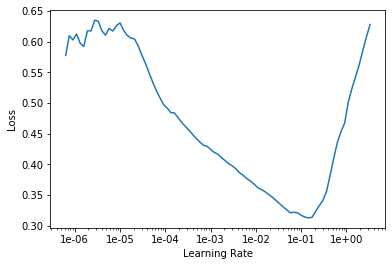

In [90]:
learn.recorder.plot()

In [92]:
learn.fit_one_cycle(5, 1e-3,wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.226503,0.242845,0.347852,00:02
1,0.153087,0.228907,0.324937,00:02
2,0.105836,0.060272,0.286044,00:02
3,0.078436,0.079157,0.213160,00:02
4,0.068848,0.040705,0.197305,00:02


In [0]:
learn.save('model.1')

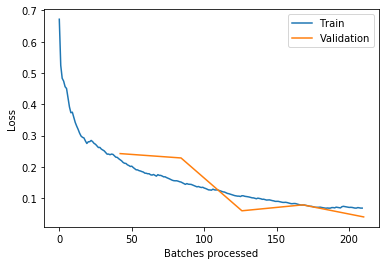

In [98]:
learn.recorder.plot_losses()

In [99]:
learn.load('model.1')

Learner(data=TabularDataBunch;

Train: LabelList (2743 items)
x: TabularList
Kürzel RE; Date 26.05.1975; year 1975; month 5; day 26; Temp.(BAFU)_na True; pH(BAFU)_na True; Leitf. 25°C(BAFU)_na True; Sauerstoff_na True; Sauerstoffsätt.%_na True; pH (EAWAG)_na False; Leitf.20°C (EAWAG)_na False; Alkalinität_na False; Calcium_na False; Magnesium_na False; Nitrit_na False; Nitrat_na False; Ammonium_na False; Kjeldahl-Stickstoff_na True; Gesamt-Stickstoff_na True; DRP_na False; Gesamt-Phosphor_na False; Kieselsäure_na False; Sulfat_na False; Natrium_na False; Kalium_na False; Eisen_na False; Chem.Sauerstoffbedarf_na True; TOC_na False; Schwebstoffe_na False; Chrom_na False; Zink_na False; Kupfer_na False; Blei_na False; Cadmium_na False; Nickel_na True; Quecksilber_na True; Temp.(BAFU) -0.1684; pH(BAFU) 0.0883; Leitf. 25°C(BAFU) 0.0884; Sauerstoff -0.0183; Sauerstoffsätt.% -0.0916; pH (EAWAG) -0.1626; Leitf.20°C (EAWAG) -0.4921; Alkalinität -0.1156; Calcium -0.0725; Magnesium -1.4810; Nitri

In [100]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.060749,0.033686,0.183594,00:02
1,0.060415,0.103185,0.234179,00:02
2,0.059762,0.033345,0.208529,00:02
3,0.056311,0.050755,0.191895,00:02
4,0.053633,0.052839,0.213331,00:02


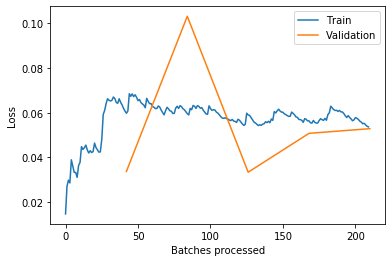

In [101]:
learn.recorder.plot_losses()